## Data Cleaning and Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("DataSets/Cust_Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
for i in df.columns:
    print(i,df[i].unique())
# Here we obtain each columns and respective unique values

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [4]:
df.replace('No phone service','No',inplace = True)
df.replace('No internet service','No',inplace = True)

In [5]:
for i in df.columns:
    print(i,df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No'

In [6]:
# Now lets convert string values to int (dummy variables)
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j] == 'Yes':
            df[i][j] = 1
        if df[i][j] == 'No':
            df[i][j] = 0
# It is better to use replace function insted of this
# yes_no_col = ['Partner','PhoneService','Dependents','PhoneService','MultipleLines','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
# for col in yes_no_col:
#     df[col].replace({'Yes':1 ,'No':0}, inplace = True)

<ipython-input-6-34700636c197>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 1
<ipython-input-6-34700636c197>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 0


In [7]:
for i in df.columns:
    print(i,df[i].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 0]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn [0 1]


In [8]:
df.drop(columns = ['customerID'],inplace = True)

In [9]:
df1 = pd.get_dummies(df[['gender','InternetService','Contract','PaymentMethod']])
df1

,gender_Female,gender_Male,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,1,0,0,0,0,1,0
1,0,1,0,1,0,0,1,0,0,0,0,1
2,0,1,0,1,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,0,1,0,0,0,0,1
7039,1,0,0,0,1,0,1,0,0,1,0,0
7040,1,0,0,1,0,1,0,0,0,0,1,0
7041,0,1,0,0,1,1,0,0,0,0,0,1


In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [11]:
df = df.drop(columns = ['gender','InternetService','Contract','PaymentMethod'])
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0
1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.5,0
2,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1
3,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.5,0
7039,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.9,0
7040,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0
7041,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.6,1


In [12]:
df2 = pd.concat([df,df1],axis = 'columns')

In [13]:
df2.dtypes

SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                                object
Churn                                       object
gender_Female                                uint8
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_DSL            

In [14]:
df2['TotalCharges'] = pd.to_numeric(df.TotalCharges,errors='coerce')
# convert object type to float

In [15]:
object_dtype = []
for i in df2.columns:
    if df2[i].dtype == 'object':
        df2[i] = pd.to_numeric(df[i],errors='coerce')
# similarly for remaining columns

In [16]:
m1 = df2.tenure.max()
m2 = df2.MonthlyCharges.max()
m3 = df2.TotalCharges.max()

df2['tenure'] = df2.tenure / m1
df2['MonthlyCharges'] = df2.MonthlyCharges / m2
df2['TotalCharges'] = df2.TotalCharges / m3


In [17]:
df2.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_DSL            

In [18]:
# df2.to_csv('DataSets/Customer_Churn_Cleaned.csv')
# Cleaned File Saved

In [19]:
df2.shape

(7043, 28)

In [20]:
df2.fillna(df2.TotalCharges.mean(),inplace = True)

In [21]:
X = df2.drop(columns = ['Churn'])
y = df2.Churn

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
model = keras.Sequential([
        keras.layers.Dense(20,input_shape = (27,),activation = 'relu'),
        keras.layers.Dense(10,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
    
)

In [25]:
model.fit(X_train,y_train,epochs = 100)

Epoch 1/100
177/177 [==============================] - 1s 751us/step - loss: 0.4808 - accuracy: 0.7726
Epoch 2/100
177/177 [==============================] - 0s 760us/step - loss: 0.4252 - accuracy: 0.8012
Epoch 3/100
177/177 [==============================] - 0s 845us/step - loss: 0.4187 - accuracy: 0.8017
Epoch 4/100
177/177 [==============================] - 0s 724us/step - loss: 0.4164 - accuracy: 0.8030
Epoch 5/100
177/177 [==============================] - 0s 951us/step - loss: 0.4149 - accuracy: 0.8048
Epoch 6/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8074
Epoch 7/100
177/177 [==============================] - 0s 859us/step - loss: 0.4128 - accuracy: 0.8076
Epoch 8/100
177/177 [==============================] - 0s 688us/step - loss: 0.4112 - accuracy: 0.8087
Epoch 9/100
177/177 [==============================] - 0s 830us/step - loss: 0.4099 - accuracy: 0.8090
Epoch 10/100
177/177 [==============================] - 0s 936us/step - los

Epoch 80/100
177/177 [==============================] - 0s 762us/step - loss: 0.3718 - accuracy: 0.8296
Epoch 81/100
177/177 [==============================] - 0s 808us/step - loss: 0.3744 - accuracy: 0.8252
Epoch 82/100
177/177 [==============================] - 0s 812us/step - loss: 0.3713 - accuracy: 0.8316
Epoch 83/100
177/177 [==============================] - 0s 787us/step - loss: 0.3712 - accuracy: 0.8291
Epoch 84/100
177/177 [==============================] - 0s 707us/step - loss: 0.3711 - accuracy: 0.8268
Epoch 85/100
177/177 [==============================] - 0s 788us/step - loss: 0.3707 - accuracy: 0.8268
Epoch 86/100
177/177 [==============================] - 0s 767us/step - loss: 0.3702 - accuracy: 0.8291
Epoch 87/100
177/177 [==============================] - 0s 707us/step - loss: 0.3721 - accuracy: 0.8266
Epoch 88/100
177/177 [==============================] - 0s 694us/step - loss: 0.3684 - accuracy: 0.8275
Epoch 89/100
177/177 [==============================] - 0s 774us

In [26]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 615us/step - loss: 0.4579 - accuracy: 0.7771


[0.4578903317451477, 0.7771469354629517]

In [27]:
y_p = model.predict(X_test)
y_p[:10]

array([[0.6382883 ],
       [0.8956496 ],
       [0.3846887 ],
       [0.19359279],
       [0.58532566],
       [0.01505259],
       [0.9427668 ],
       [0.56121725],
       [0.29399395],
       [0.720986  ]], dtype=float32)

In [28]:
predicted = []
for i in y_p:
    if i >= 0.5:
        predicted.append(1)
    else:
        predicted.append(0)


In [29]:
predicted[:10]

[1, 1, 0, 0, 1, 0, 1, 1, 0, 1]

In [30]:
y_test[:10]

1771    1
176     1
1504    0
880     1
4738    1
2910    0
5039    1
1029    1
1111    1
1679    0
Name: Churn, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted,y_test)

<AxesSubplot:>

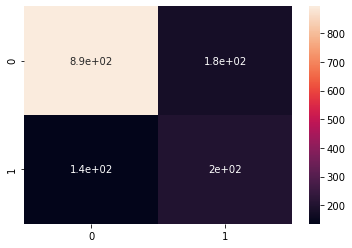

In [32]:
import seaborn as sn
sn.heatmap(cm,annot=True)

## Precision Recall and F1-Score

In [33]:
# Precision & Recall (From Confusion Matrix)

# True Positive(TP) = positive class with correct prediction
# False Positive(FP) = positive class but wrong prediction
# True Negative(TN) = Negative class with correct prediction
# False Negative(FN) = Negative class but wrong prediction

# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
#  F1 Score = 2*Precision*Recall  / (Precision + Recall)